# Задание
Реализовать с помощью объектно-ориентированного подхода предыдущие 2 задания. Создайте для каждой из задач отдельный класс, который позволяет ее решить.

* Собрать информацию о всех строящихся объектах на сайте "наш.дом.рф"
* Cохранить ее в pandas dataframe, а также в excel, pickle, БД

* Проверить состояние датафрейма и привести его в формат, позволяющий дальнейшее исследование данных

*  Сделать визуализацию для мини-исследования рынка строящейся недвижимости в одном или нескольких регионах с помощью pandas, matplotlib, seaborn, plotly и других инструментов.

In [1]:
#Импортирование библиотек
import requests
import pandas as pd
import sqlite3

#Библиотеки визуализации
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
%matplotlib inline

In [2]:
#Создание подлкючения к базе данных
conn = sqlite3.connect('our_home_data')

## Список объектов

Первый способ

In [3]:
'''
Этот класс позволяет получить все объекты, 
в которых хранится информация о строящихся 
домах с сайта https://наш.дом.рф. 
Вызывая метод get_list_obj.
Способ первый.
'''

class List_obj_f:
    
    def  __init__(self):
        self.offset_ = 0
        self.limit_ = 500
        self.all_results = []
        
    def __repr__(self):
        return f"Точка начала: {self.offset_}; Шаг: {self.limit_}; Бесконечное количество повторений"
        

    def get_list_obj(self):
        while True:
            url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={self.offset_}&limit={self.limit_}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'
            response = requests.get(url)
            objects_data = response.json()
            objects_list = objects_data.get('data').get('list')
            self.all_results.extend([x.get('objId') for x in objects_list])
            if len(objects_list) == 0:
                break
            self.offset_ += self.limit_
        print ('Данные получены!')
        return self.all_results
print (List_obj_f())
all_results = List_obj_f()
all_results = all_results.get_list_obj()

Точка начала: 0; Шаг: 500; Бесконечное количество повторений
Данные получены!


Второй способ

In [ ]:
'''
Этот класс позволяет получить все объекты, 
в которых хранится информация о строящихся 
домах с сайта https://наш.дом.рф. 
Вызывая метод get_list_obj.
Способ второй.
'''

class List_obj_s:
    def __init__(self, offset_, limit_):
        self.offset_ = limit_
        self.limit_ = offset_
        
    def get_list_obj(self):
        url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={self.offset_}&limit={self.limit_}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'
        res = requests.get(url)
        objects_data = res.json()
        objects_list = objects_data.get('data').get('list')
        objids = [x.get('objId') for x in objects_list]
        print ('Данные получены!')
        return objids
    
data_f = List_obj_s (0, 5000)
data_s = List_obj_s (5001,5000)
data_t = List_obj_s (10001, 5000)

data_f = data_f.get_list_obj ()
data_s = data_s.get_list_obj ()
data_t = data_t.get_list_obj ()

all_results = []
all_results.extend(data_f)
all_results.extend(data_s)
all_results.extend(data_t)
len(all_results)

# Данные по определенному объекту

In [4]:
'''
Этот класс принимает в себя список id объектов и 
получает подробную информацию о каждом из них. 
Сохранение объектов приводит список.
Вызывая метод info_object.
'''
class info_object:
    def __init__ (self):
        self.data = []
        
    def get_info_about_object(self, all_results):     
        for i in range(len(all_results)):
            try:
                url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/{all_results[i]}'
                res = requests.get(url)
                self.data.append (res.json()) 

            except ConnectionError:
                print ('Пропущен объект, Ошибка сети!')

        return self.data


data = info_object()
data = data.get_info_about_object(all_results[:300:])

data_normilize = pd.json_normalize(data, max_level = 15)
data_normilize.head(5)

,errcode,data.id,data.pdId,data.developer.devId,data.developer.devShortCleanNm,data.developer.devShortNm,data.developer.devFullCleanNm,data.developer.problObjCnt,data.developer.buildObjCnt,data.developer.comissObjCnt,...,data.developer.bankruptStage.bankruptStageDesc,data.developer.bankruptStage.bankruptLawUrl,data.developer.orgBankruptMsgDttm,data.metro.id,data.metro.name,data.metro.line,data.metro.color,data.metro.time,data.metro.isWalk,data.metro.colors
0,0,29679,124647,7424,212-2,212-2,212-2,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,13383,28105,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,13397,28141,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,13399,28141,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,13398,28141,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Cохранение в различных форматах

In [5]:
'''
Этот класс принимает датафрейм, который
сохраняется в форматах вызывая метод 
save_sql_pickle_excel:
1) SQL
2) Pickle
3) Excel
'''
class Save_data:
    def __init__(self, data_normilize):
        self.data_normilize = data_normilize
        
    def save_sql_pickle_excel(self):
        self.data_normilize = self.data_normilize.applymap(str)
        self.data_normilize.to_sql('building', conn, if_exists = 'replace', index = False)
        conn.commit()
        conn.close
        self.data_normilize.to_pickle('our_home_data.pkl')
        self.data_normilize.to_excel('our_home_data.xlsx')
        print ('Файлы сохранены в папке исполения!')
        
save_data = Save_data(data_normilize)
save_data.save_sql_pickle_excel()

Файлы сохранены в папке исполения!


# Получение изображений

In [6]:
'''
Этот класс принимает в себя список id объектов
и производит скачивание фотографий объектов 
вызывая метод download_png
'''
class Png_downloader:
    def __init__(self, all_results):
        self.all_results = all_results
        
    def download_png(self, count):
        for i in range (count):
            id_ = all_results[i]
            try:
                url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/' + str(id_)
                res = requests.get(url)
                objects_data = res.json()
                objects_data.keys()
                url = objects_data['data']['photoRenderDTO'][0]['objRenderPhotoUrl']
                res = requests.get(url)
                out = open(str(id_)+".jpg", "wb")
                out.write(res.content)
                out.close()
            except:
                pass

count = 5
png_download = Png_downloader(all_results)
png_download.download_png(count)

# Подготовка и импорт данных

In [7]:
missing_values = ["nan",'N/A']
df = pd.read_csv('our_home_data.csv', na_values = missing_values)
pd.set_option('display.max_columns', None)

# Просмотр DataSet

In [8]:
df.shape

(10527, 110)

In [9]:
df.head(5)

,Unnamed: 0,errcode,data.id,data.pdId,data.developer.devId,data.developer.devShortCleanNm,data.developer.devShortNm,data.developer.devFullCleanNm,data.developer.problObjCnt,data.developer.buildObjCnt,data.developer.comissObjCnt,data.developer.regRegionDesc,data.developer.devPhoneNum,data.developer.devSite,data.developer.devEmail,data.developer.devInn,data.developer.devOgrn,data.developer.devKpp,data.developer.devLegalAddr,data.developer.devFactAddr,data.developer.lastRpdId,data.developer.fundGuarantyFlg,data.developer.devOrgRegRegionCd,data.developer.devEmplMainFullNm,data.developer.orgForm.id,data.developer.orgForm.fullForm,data.developer.orgForm.shortForm,data.developer.objGuarantyEscrowFlg,data.developer.govFundFlg,data.region,data.address,data.objElemLivingCnt,data.objReady100PercDt,data.wallMaterialShortDesc,data.objLkFinishTypeDesc,data.objLkFreePlanDesc,data.objElemParkingCnt,data.objSquareLiving,data.rpdNum,data.rpdPdfLink,data.rpdIssueDttm,data.objLkLatitude,data.objLkLongitude,data.objCompensFundFlg,data.objProblemFlg,data.objLkClassDesc,data.loadDttm,data.photoRenderDTO,data.objGuarantyEscrowFlg,data.objectType,data.residentialBuildings,data.newBuildingId,data.objFlatCnt,data.objFlatSq,data.objNonlivElemCnt,data.objStatus,data.isAvailableWantLiveHere,data.objInfrstrBicycleLaneFlg,data.objInfrstrRampFlg,data.objInfrstrCurbLoweringFlg,data.objectTransportInfo,data.conclusion,data.objLkSaleDepEmail,data.objGreenHouseFlg,data.objEnergyEffShortDesc,data.infrastructureIndexValue,data.developer.developerGroupName,data.developer.companyGroupId,data.floorMin,data.floorMax,data.miniUrl,data.objFloorCnt,data.quartography.objLivElem1KCnt,data.quartography.objLivElem2KCnt,data.quartography.objLivElem3KCnt,data.quartography.objLivElem4KCnt,data.quartography.objLivElemCnt,data.quartography.objLivElemEntrCnt,data.quartography.objLivElemEntrFloorAvg,data.objTransferPlanDt,data.objLivCeilingHeight,data.objInfrstrPlaygrndCnt,data.objInfrstrSportGroundCnt,data.objInfrstrTrashAreaCnt,data.objInfrstrObjPrkngCnt,data.objInfrstrNotObjPrkngCnt,data.objElevatorWheelchairCnt,data.objElevatorPassengerCnt,data.objElevatorCargoCnt,data.soldOutPerc,data.objPriceAvg,data.generalContractorNm,data.nonlivFirstFloor,data.transportDistIndex,data.transportDistIndexValue,data.nameObj,data.greenAreaIndexValue,data.airQualityIndexValue,data.complexShortNm,data.developer.bankruptStage.bankruptStageCd,data.developer.bankruptStage.bankruptStageDesc,data.developer.bankruptStage.bankruptLawUrl,data.developer.orgBankruptMsgDttm,data.metro.id,data.metro.name,data.metro.line,data.metro.color,data.metro.time,data.metro.isWalk,data.metro.colors
0,0,0,29678,124648,7424,212-2,212-2,212-2,0,2,0,Ростовская область,+7(961)285-90-10,taganrogjsk.wixsite.com,kirpol76@gmail.com,6154572922,1116154005923,615401001,"Ростовская область, город Таганрог, улица Своб...",обл Ростовская город Таганрог улица Сергея Шил...,126093.0,0,61.0,Снимщикова Ольга Викторовна,20,Жилищный или жилищно-строительный кооператив,ЖСК,0,0,61,"город Таганрог, улица Сергея Шило, д. 212-2",27,2020-03-31,Другое,Под чистовую,Нет,0,1519.00,61-000819,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,20-03-2019 18:18,47.2197,38.9134,0,0,Комфорт,17-08-2022 01:24,[],0,normal,1,15941,27,1519.00,0,0,True,0,0,0,[],False,fonddolomsk@bk.ru,0,Не нормируется,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,29679,124647,7424,212-2,212-2,212-2,0,2,0,Ростовская область,+7(961)285-90-10,taganrogjsk.wixsite.com,kirpol76@gmail.com,6154572922,1116154005923,615401001,"Ростовская область, город Таганрог, улица Своб...",обл Ростовская город Таганрог улица Сергея Шил...,126093.0,0,61.0,Снимщикова Ольга Викторовна,20,Жилищный или жилищно-строительный кооператив,ЖСК,0,0,61,г Таганрог,18,2020-03-31,Другое,Под ключ,Есть,0,1519.00,61-000818,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,20-03-2019 18

In [10]:
df.dtypes

Unnamed: 0                int64
errcode                   int64
data.id                   int64
data.pdId                 int64
data.developer.devId      int64
                         ...   
data.metro.line          object
data.metro.color         object
data.metro.time         float64
data.metro.isWalk        object
data.metro.colors        object
Length: 110, dtype: object

In [11]:
df.describe()

,Unnamed: 0,errcode,data.id,data.pdId,data.developer.devId,data.developer.problObjCnt,data.developer.buildObjCnt,data.developer.comissObjCnt,data.developer.devInn,data.developer.devOgrn,data.developer.devKpp,data.developer.lastRpdId,data.developer.fundGuarantyFlg,data.developer.devOrgRegRegionCd,data.developer.orgForm.id,data.developer.objGuarantyEscrowFlg,data.developer.govFundFlg,data.region,data.objElemLivingCnt,data.objElemParkingCnt,data.objSquareLiving,data.objLkLatitude,data.objLkLongitude,data.objCompensFundFlg,data.objProblemFlg,data.objGuarantyEscrowFlg,data.residentialBuildings,data.newBuildingId,data.objFlatCnt,data.objFlatSq,data.objNonlivElemCnt,data.objStatus,data.objInfrstrBicycleLaneFlg,data.objInfrstrRampFlg,data.objInfrstrCurbLoweringFlg,data.objGreenHouseFlg,data.infrastructureIndexValue,data.developer.companyGroupId,data.floorMin,data.floorMax,data.objFloorCnt,data.quartography.objLivElem1KCnt,data.quartography.objLivElem2KCnt,data.quartography.objLivElem3KCnt,data.quartography.objLivElem4KCnt,data.quartography.objLivElemCnt,data.quartography.objLivElemEntrCnt,data.quartography.objLivElemEntrFloorAvg,data.objInfrstrPlaygrndCnt,data.objInfrstrSportGroundCnt,data.objInfrstrTrashAreaCnt,data.objInfrstrObjPrkngCnt,data.objInfrstrNotObjPrkngCnt,data.objElevatorWheelchairCnt,data.objElevatorPassengerCnt,data.objElevatorCargoCnt,data.soldOutPerc,data.objPriceAvg,data.nonlivFirstFloor,data.transportDistIndexValue,data.greenAreaIndexValue,data.airQualityIndexValue,data.developer.bankruptStage.bankruptStageCd,data.metro.id,data.metro.time
count,10527.000000,10527.0,10527.000000,10527.000000,10527.000000,10527.000000,10527.000000,10527.000000,1.052700e+04,1.052700e+04,1.052700e+04,10526.00000,10527.000000,10407.000000,10527.000000,10527.000000,10527.000000,10527.000000,10527.000000,10527.000000,10527.000000,10516.000000,10516.000000,10527.000000,10527.0,10527.000000,10527.000000,1.052700e+04,10527.000000,10527.000000,10527.000000,10527.0,10527.000000,10527.000000,10527.000000,10527.000000,10527.000000,7750.000000,10523.000000,10525.000000,10525.000000,9363.000000,9363.000000,9363.000000,9363.000000,9363.000000,9363.000000,9363.000000,10450.000000,10448.000000,10450.000000,10445.000000,10438.000000,10450.000000,10450.000000,10450.000000,7.609000e+03,7.604000e+03,10516.000000,2143.000000,1603.000000,1252.000000,103.000000,83.000000,83.000000
mean,5263.000000,0.0,38049.551819,389144.793388,7350.374941,0.074380,12.484089,8.929325,5.103416e+09,1.223806e+12,4.972807e+08,618061.16977,0.151515,49.589315,5.033153,0.869763,0.007600,48.743897,190.112093,36.477914,9449.618125,53.638272,52.331917,0.111903,0.0,0.844495,0.890662,1.016204e+05,190.112093,9449.618125,40.972357,0.0,0.161395,0.617650,0.904056,0.187708,5.770590,6452.500645,10.493585,12.518765,12.518765,113.311011,69.410873,27.595642,3.300972,213.618498,3.054470,7.143864,1.519330,1.301780,1.329569,48.853997,34.622150,0.402775,2.407656,0.997225,4.760432e-01,1.119462e+05,0.400913,5.194120,5.207735,7.040735,4.427184,35.705855,17.860643
std,3039.027476,0.0,9866.704287,191919.233183,4856.884717,0.922246,25.550732,25.494545,2.434959e+09,5.714933e+11,2.335760e+08,35089.57599,0.358567,23.404561,10.647262,0.336579,0.086847,23.175334,235.800885,116.035248,11407.080243,5.056758,26.117196,0.315262,0.0,0.362403,0.312078,4.898821e+04,235.800885,11407.080243,119.294633,0.0,0.367912,0.485985,0.294528,0.390497,2.696874,1079.244126,7.755006,8.426170,8.426170,152.925890,84.102110,44.313148,14.836839,239.799907,3.247503,4.634185,1.732095,1.632548,1.325377,85.652793,98.087156,1.382101,3.575009,2.356716,3.482273e-01,1.109353e+05,0.490107,2.895088,2.855862,1.363836,0.858658,42.712610,7.281856
min,0.000000,0.0,851.000000,172.000000,10.000000,0.000000,1.000000,0.000000,1.050087e+08,1.020101e+12,1.050100e+07,96889.00000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,42.053200,19.903300,0.000000,0.0,0.000000,0.000000,2.900000e+01,0.000000,0.000000,0.000000,0.0,0.00

# Чистка данных

Удаление стобцов, где находится более 50% пустых ячеек

In [12]:
df = df.drop(columns = 'data.developer.bankruptStage.bankruptStageCd')
df = df.drop(columns = 'data.developer.bankruptStage.bankruptStageDesc')
df = df.drop(columns = 'data.developer.bankruptStage.bankruptLawUrl')
df = df.drop(columns = 'data.developer.orgBankruptMsgDttm')
df = df.drop(columns = 'data.metro.id')
df = df.drop(columns = 'data.metro.name')
df = df.drop(columns = 'data.metro.line')
df = df.drop(columns = 'data.metro.color')
df = df.drop(columns = 'data.metro.time')
df = df.drop(columns = 'data.metro.isWalk')
df = df.drop(columns = 'data.metro.colors')
df = df.drop(columns = 'data.transportDistIndexValue')
df = df.drop(columns = 'data.photoRenderDTO')
df = df.drop(columns = 'data.objectTransportInfo')

Очистка строк с NaN из-за невозможности восстановления данных для подзадачи 1

In [13]:
df_avg_P = df.dropna(subset=['data.objPriceAvg','data.developer.regRegionDesc','data.objReady100PercDt'])

# Анализ Данных
### Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены.

In [14]:
avg_price_region_nv = df.groupby('data.developer.regRegionDesc').mean()
avg_price_region_nv = avg_price_region_nv.sort_values(by='data.objPriceAvg')
avg_price_region = avg_price_region_nv['data.objPriceAvg']
avg_price_region.head(5)

data.developer.regRegionDesc
Мурманская область                     20442.000000
Дагестан Республика                    30793.933333
Чеченская Республика                   32742.333333
Северная Осетия - Алания Республика    43500.117647
Кабардино-Балкарская Республика        48194.600000
Name: data.objPriceAvg, dtype: float64

### Рассчитать объемы вводимого жилья по регионам и по годам

In [15]:
data_prepare = df
c = 0
date_data = []
for i in data_prepare['data.objReady100PercDt']:
    if i not in date_data:
        date_data.append(i)

for i in date_data:
    data_prepare = data_prepare.replace(i,i[:4:])

In [16]:
count_data = data_prepare.groupby(['data.developer.regRegionDesc','data.objReady100PercDt']).count()
count_data = count_data.sort_values(by='data.objReady100PercDt')
count_build_data = count_data['data.id'].unstack()
count_build_data.head(5)

data.objReady100PercDt,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2036,2038,2039
data.developer.regRegionDesc,,,,,,,,,,,,,,,,,,,,,
Адыгея Республика,NaN,NaN,NaN,NaN,NaN,8.0,7.0,9.0,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Алтай Республика,NaN,NaN,NaN,NaN,NaN,4.0,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Алтайский край,NaN,NaN,NaN,NaN,NaN,23.0,36.0,17.0,10.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Амурская область,NaN,NaN,NaN,NaN,NaN,7.0,13.0,9.0,2.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Архангельская область,NaN,NaN,NaN,NaN,NaN,10.0,28.0,16.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Визуализация
### Визуализация средней цены за квадратный метр в каждом регионе

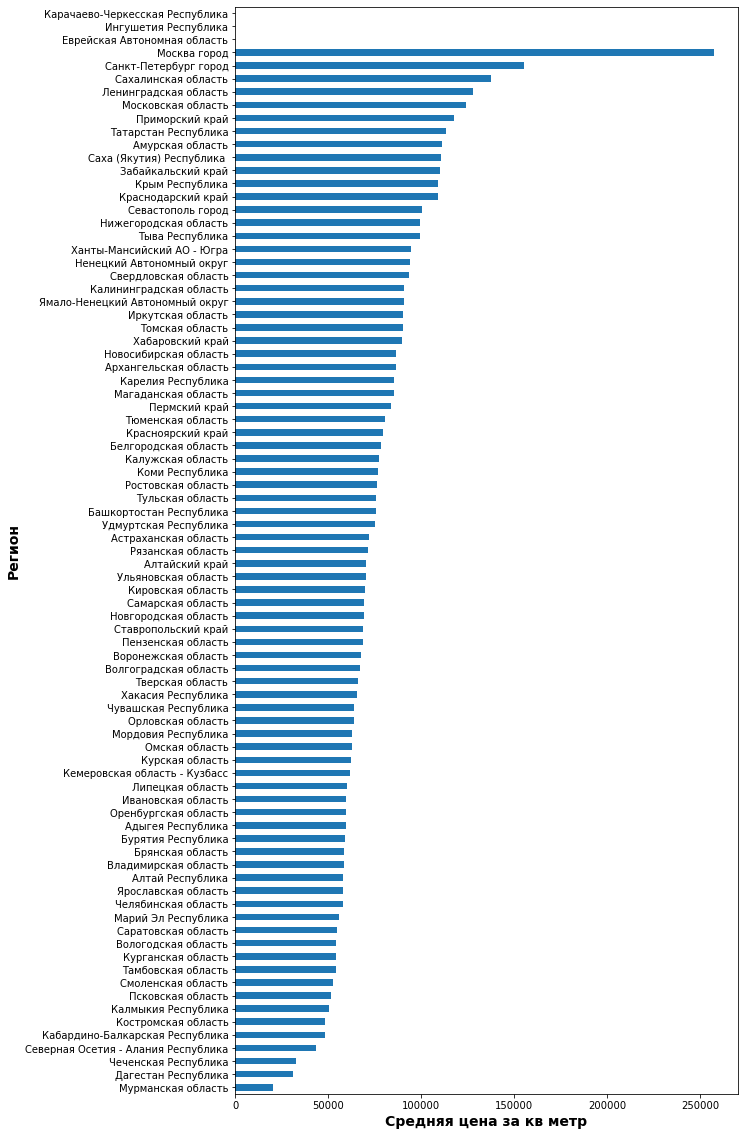

In [17]:
rcParams['figure.figsize'] = 9,20
avg_price_region.plot(kind='barh')
plt.xlabel("Средняя цена за кв метр",fontsize=14, fontweight="bold")
plt.ylabel("Регион",fontsize=14, fontweight="bold")
avg_price_region.sort_values(ascending=False)
plt.show()

### Визуализация количества строящихся домов в каждом регионе за каждый год 

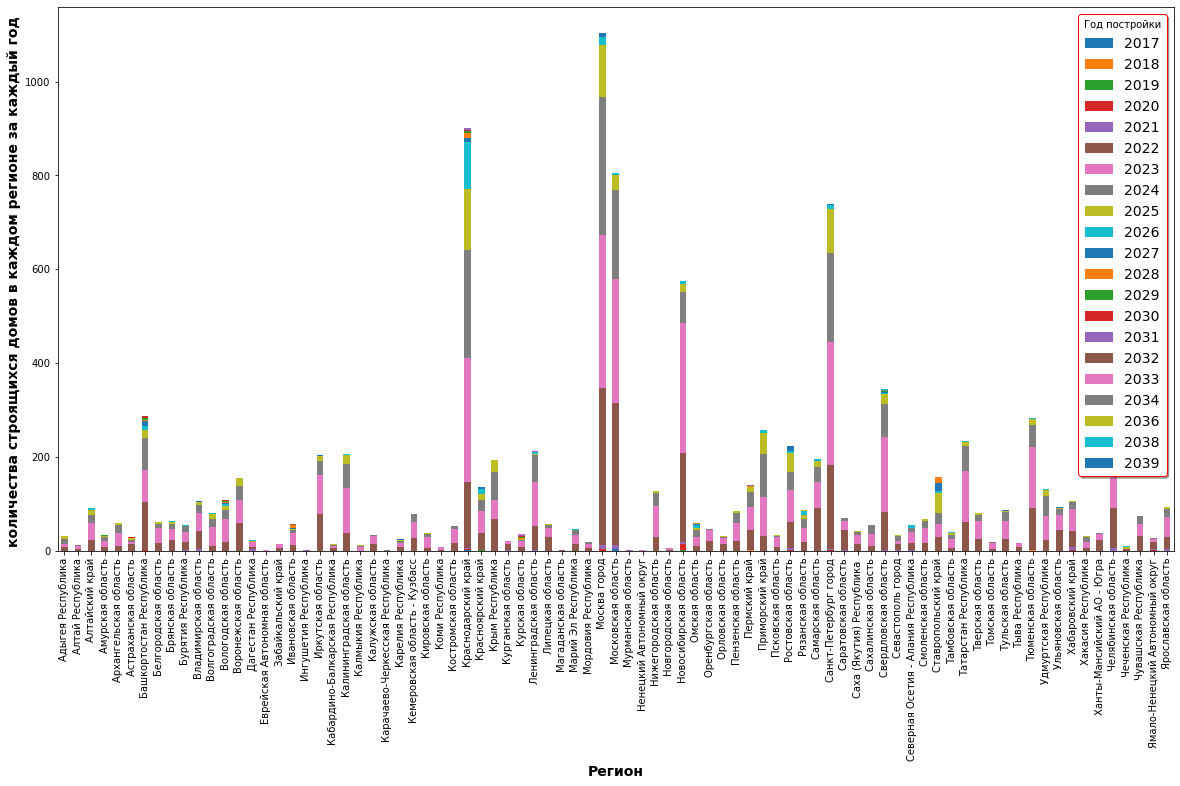

In [18]:
count_build_data.dtypes
rcParams['figure.figsize'] = 20,10
#count_build_data.plot(kind='barh')
count_build_data.plot.bar(stacked=True)
plt.xlabel("Регион",fontsize=14, fontweight="bold")
plt.ylabel("количества строящихся домов в каждом регионе за каждый год ",fontsize=14, fontweight="bold")
plt.legend(fontsize=14, shadow=True, framealpha=1, edgecolor='r', title='Год постройки')
avg_price_region.sort_values(ascending=False)
plt.show()

Text(0.5, 1.0, 'Количества строящихся домов в каждом регионе за каждый год')

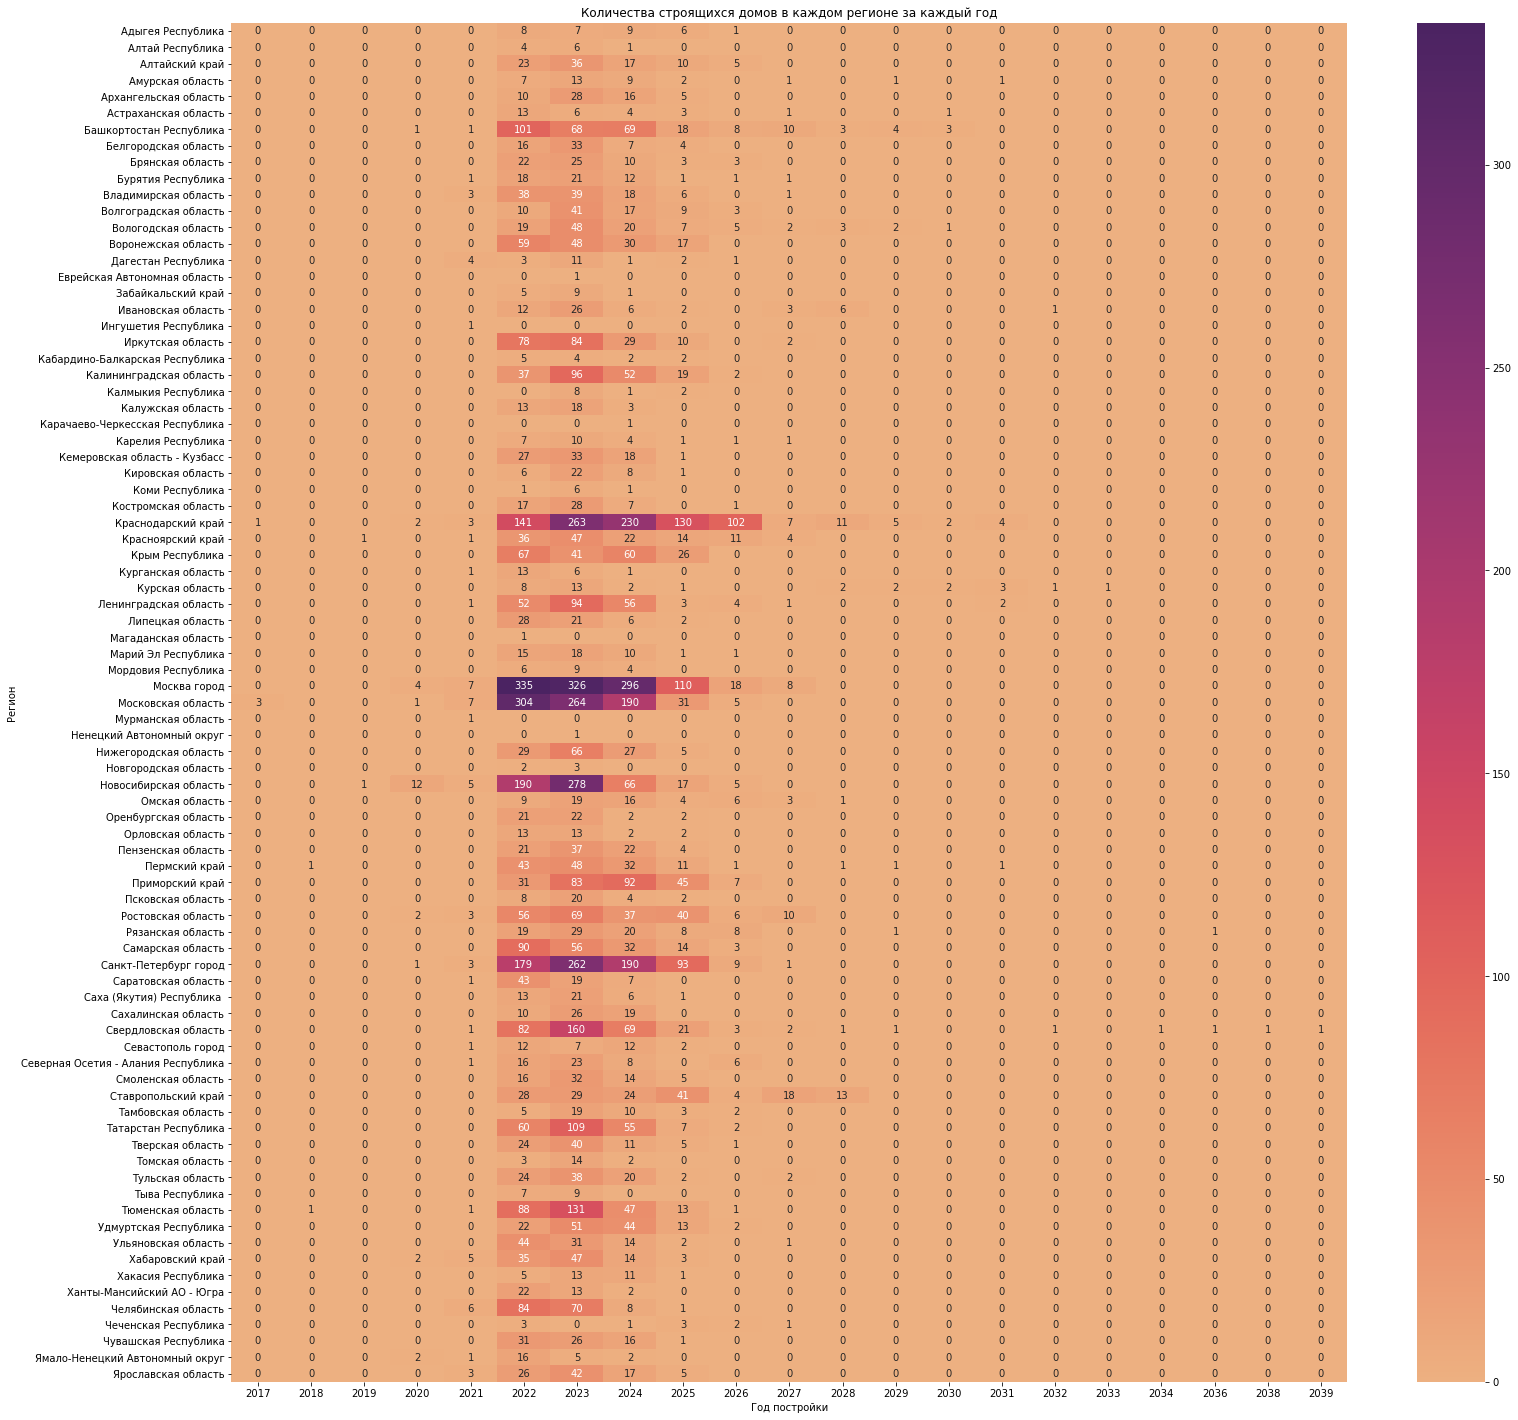

In [19]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
count_build_data_with_na = count_build_data.fillna(0)
array = count_build_data_with_na
df_cm = pd.DataFrame(array)
plt.figure(figsize = (25,25))
sn.heatmap(df_cm, annot= True, cmap="flare", fmt='.4g')
plt.xlabel('Год постройки')
plt.ylabel('Регион')
plt.title('Количества строящихся домов в каждом регионе за каждый год')

# Выводы 
Исходя из проведенного анализа мы можем точно сказать, что самые дорогие средние кв^2 находтся в регионе города Москвы. Также можно заметить, что в 2023-2025 будет отдано жильцам большое количество домов, но также уже есть небольшие планы застройки на 2028 год.